## Wine quality dataset - Clustering
    - clustering 2, 3, 4, 5, 6 => 성능 비교

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine = pd.read_csv('data/winequality_red.csv')
wine['target'] = wine.quality.apply(lambda x: 1 if x>=6 else 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [4]:
X = wine.iloc[:, :-2].values
y = wine.target.values

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
wine_std = StandardScaler().fit_transform(X)

In [10]:
def pca_accuracy_rfc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=2023
    )
    rfc = RandomForestClassifier(random_state=2023)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return score

In [12]:
for n in [1,2,3,4,5,6,7,8,9,10,11]:
    pca = PCA(n_components=n, random_state=2023)
    wine_pca = pca.fit_transform(wine_std)
    explained = sum(pca.explained_variance_ratio_)
    accuracy = pca_accuracy_rfc(wine_pca, wine.quality)
    print(f'PCA{n}: 설명력-{explained:.4f}, 정확도-{accuracy:.4f}')

PCA1: 설명력-0.2817, 정확도-0.5188
PCA2: 설명력-0.4568, 정확도-0.5687
PCA3: 설명력-0.5978, 정확도-0.6094
PCA4: 설명력-0.7081, 정확도-0.6375
PCA5: 설명력-0.7953, 정확도-0.6844
PCA6: 설명력-0.8552, 정확도-0.6750
PCA7: 설명력-0.9083, 정확도-0.6813
PCA8: 설명력-0.9468, 정확도-0.7063
PCA9: 설명력-0.9781, 정확도-0.7219
PCA10: 설명력-0.9946, 정확도-0.7312
PCA11: 설명력-1.0000, 정확도-0.7031


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=2023, n_init='auto')
    for n in range(1, 12):
        pca = PCA(n_components=n, random_state=2023)
        wine_pca = pca.fit_transform(wine_std)
        kmeans.fit(wine_pca)
        sil_score = silhouette_score(wine_std, kmeans.labels_)
        explained = sum(pca.explained_variance_ratio_)
        accuracy = pca_accuracy_rfc(wine_pca, wine.quality)
        print(f'(PCA {n}): 설명력-{explained:.4f}, 정확도-{accuracy:.4f} (clustering {i}): 실루엣점수{sil_score:.4f}')

(PCA 1): 설명력-0.2817, 정확도-0.5188 (clustering 2): 실루엣점수0.2058
(PCA 2): 설명력-0.4568, 정확도-0.5687 (clustering 2): 실루엣점수0.2143
(PCA 3): 설명력-0.5978, 정확도-0.6094 (clustering 2): 실루엣점수0.2063
(PCA 4): 설명력-0.7081, 정확도-0.6375 (clustering 2): 실루엣점수0.2066
(PCA 5): 설명력-0.7953, 정확도-0.6844 (clustering 2): 실루엣점수0.2068
(PCA 6): 설명력-0.8552, 정확도-0.6750 (clustering 2): 실루엣점수0.2069
(PCA 7): 설명력-0.9083, 정확도-0.6813 (clustering 2): 실루엣점수0.2073
(PCA 8): 설명력-0.9468, 정확도-0.7063 (clustering 2): 실루엣점수0.2062
(PCA 9): 설명력-0.9781, 정확도-0.7219 (clustering 2): 실루엣점수0.2065
(PCA 10): 설명력-0.9946, 정확도-0.7312 (clustering 2): 실루엣점수0.2070
(PCA 11): 설명력-1.0000, 정확도-0.7031 (clustering 2): 실루엣점수0.2068
(PCA 1): 설명력-0.2817, 정확도-0.5188 (clustering 3): 실루엣점수0.1184
(PCA 2): 설명력-0.4568, 정확도-0.5687 (clustering 3): 실루엣점수0.1738
(PCA 3): 설명력-0.5978, 정확도-0.6094 (clustering 3): 실루엣점수0.1695
(PCA 4): 설명력-0.7081, 정확도-0.6375 (clustering 3): 실루엣점수0.2001
(PCA 5): 설명력-0.7953, 정확도-0.6844 (clustering 3): 실루엣점수0.1899
(PCA 6): 설명력-0.8552, 정확도-0.6750 (clust

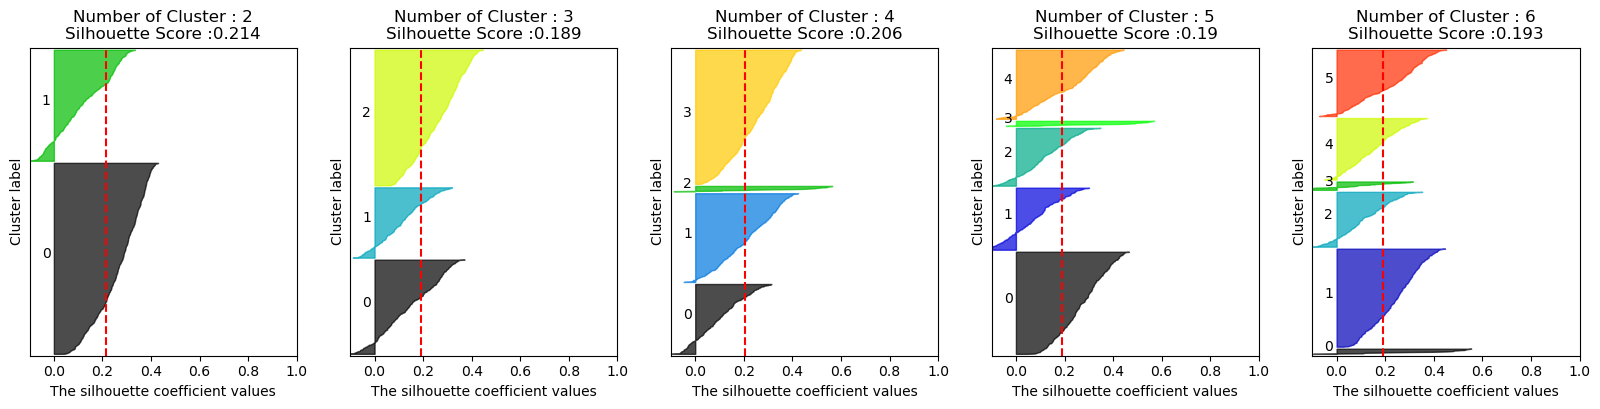

In [19]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5,6], wine_std)